# Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data_train = pd.read_csv('/Data/Visual Studio Code/Data Science/Dataset/UNSW-NB15/UNSW_NB15_training-set.csv')
data_test = pd.read_csv('/Data/Visual Studio Code/Data Science/Dataset/UNSW-NB15/UNSW_NB15_testing-set.csv')

In [3]:
data_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [5]:
# Handle missing value and duplicate if any
data_train.dropna(inplace=True)
data_train.drop_duplicates(inplace=True)

data_test.dropna(inplace=True)
data_test.drop_duplicates(inplace=True)

In [29]:
#Split Attack and Normal from dataframe
data_train_attack = data_train[data_train['label'] == 1]
data_test_attack = data_test[data_test['label'] == 1]

#Optional
#data_train_normal = data_train[data_train['label'] == 0]
#data_test_normal = data_test[data_test['label'] == 0]

In [30]:
# Drop id and label from train and test data
data_train_attack = data_train_attack.drop('id', axis=1)
data_train_attack = data_train_attack.drop('label', axis=1)

data_test_attack = data_test_attack.drop('id', axis=1)
data_test_attack = data_test_attack.drop('label', axis=1)

## Encode Train and Test Data

In [31]:
#column to encode
cols = ['proto','state','service']
cols

['proto', 'state', 'service']

In [32]:
#One-hot Encoding
# Encode train data
data_train_attack = pd.get_dummies(data_train_attack, columns=cols)

# Encode test data
data_test_attack = pd.get_dummies(data_test_attack, columns=cols)

In [35]:
train_attack_cat = data_train_attack.pop('attack_cat')
test_attack_cat = data_test_attack.pop('attack_cat')

## Normalization

In [33]:
# Min-Max Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_norm = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 
                'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 
                'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 
                'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 
                'ct_srv_dst', 'is_sm_ips_ports']

data_train_attack[cols_to_norm] = scaler.fit_transform(data_train_attack[cols_to_norm])
data_test_attack[cols_to_norm] = scaler.fit_transform(data_test_attack[cols_to_norm])

## Feature Selection

In [ ]:
#Correlation between feature
#%matplotlib inline
plt.figure(figsize=[32,32])
sns.heatmap(data_train_attack.corr(), annot=True, fmt=".2f")
plt.show()

In [37]:
#Feature Selection
feature = data_train_attack.drop(['dinpkt', 'ct_ftp_cmd', 'ct_src_dport_ltm', 'is_sm_ips_ports'], axis=1)
feature.dtypes

dur               float64
spkts             float64
dpkts             float64
sbytes            float64
dbytes            float64
                   ...   
service_radius       bool
service_smtp         bool
service_snmp         bool
service_ssh          bool
service_ssl          bool
Length: 183, dtype: object

In [ ]:
#Correlation between feature
#%matplotlib inline
plt.figure(figsize=[32,32])
sns.heatmap(feature.corr(), annot=True, fmt=".2f")
plt.show()

# Balancing Data

In [38]:
#Splitting the dataset into dependent and independent feature
X_train = feature
y_train = train_attack_cat

X_test = data_test_attack.drop(columns=['dinpkt', 'ct_ftp_cmd', 'ct_src_dport_ltm', 'is_sm_ips_ports'])
y_test = test_attack_cat

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((45332, 183), (45332,), (119341, 182), (119341,))

## SMOTE-Tomek Links

In [39]:
from imblearn.combine import SMOTETomek

stl = SMOTETomek(sampling_strategy='auto')
#stl = SMOTETomek(sampling_strategy=dict({2: 8000, 3: 7800}))
X_stl, y_stl = stl.fit_resample(X_train, y_train)

X_stl.shape, y_stl.shape

((159703, 183), (159703,))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Reconnaissance'),
  Text(1, 0, 'Backdoor'),
  Text(2, 0, 'DoS'),
  Text(3, 0, 'Exploits'),
  Text(4, 0, 'Analysis'),
  Text(5, 0, 'Fuzzers'),
  Text(6, 0, 'Worms'),
  Text(7, 0, 'Shellcode'),
  Text(8, 0, 'Generic')])

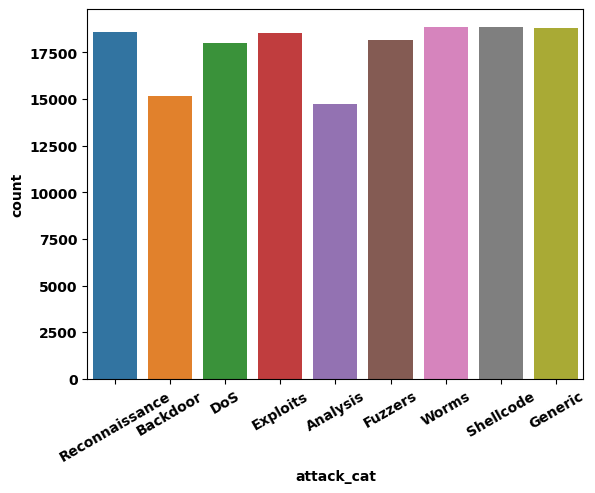

In [43]:
#Create new dataframe from X_stl and y_stl to count every attack
data_stl = pd.concat([X_stl, y_stl], axis=1)

sns.countplot(data=data_stl, x="attack_cat")
plt.xticks(rotation=30)

In [44]:
#data_stl.drop_duplicates(inplace=True)
print(data_stl.value_counts('attack_cat'))
print("--------------------")
print("Shape: " + str(data_stl.shape))
print("--------------------")
print("Duplicates: " + str(data_stl.duplicated().sum()))

attack_cat
Worms             18871
Shellcode         18855
Generic           18803
Reconnaissance    18567
Exploits          18553
Fuzzers           18152
DoS               18019
Backdoor          15155
Analysis          14728
Name: count, dtype: int64
--------------------
Shape: (159703, 184)
--------------------
Duplicates: 46973


# Model Architecture

In [45]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

## CNN Model

In [56]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=64, activation='relu', input_shape=(183, 1)))
model.add(MaxPooling1D(pool_size=10))
model.add(Flatten())
model.add(Dense(9, activation='relu'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 120, 64)           4160      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 12, 64)            0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 768)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 769       
                                                                 
Total params: 4929 (19.25 KB)
Trainable params: 4929 (19.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the model

In [58]:
X_stl = X_stl.astype('float32')
X_test = X_test.astype('float32')

model.fit(X_stl, y_stl, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


UnimplementedError: Graph execution error:

Detected at node categorical_crossentropy/Cast defined at (most recent call last):
  File "c:\Users\Acer\miniconda3\envs\myenv\lib\runpy.py", line 196, in _run_module_as_main

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\runpy.py", line 86, in _run_code

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\asyncio\base_events.py", line 603, in run_forever

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\asyncio\base_events.py", line 1909, in _run_once

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\asyncio\events.py", line 80, in _run

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code

  File "C:\Users\Acer\AppData\Local\Temp\ipykernel_21076\3771992053.py", line 4, in <module>

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\keras\src\engine\training.py", line 1127, in train_step

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\keras\src\losses.py", line 270, in call

  File "c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\keras\src\losses.py", line 2198, in categorical_crossentropy

Cast string to float is not supported
	 [[{{node categorical_crossentropy/Cast}}]] [Op:__inference_train_function_1392]